In [6]:
import lightgbm as lgb
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [7]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
model = lgb.LGBMRegressor(objective="regression", n_estimators=1000, learning_rate=0.05, num_leaves=31)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="rmse")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='regression')

In [21]:
y_pred = model.predict(X_test)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [22]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

MAE: 0.2834802719957147
RMSE: 0.4330310791003862
R2 Score: 0.8569027543457712


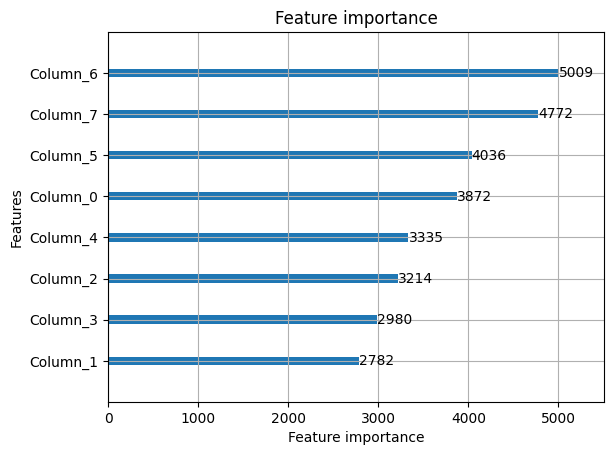

In [23]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

lgb.plot_importance(model, max_num_features=10)
plt.show()

In [16]:
params = {"objective": "regression", "metric": "rmse"}

In [ ]:

pred = model.predict(X_test)


In [ ]:
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, early_stopping_rounds=10)